### Step 1: Import relevant libraries 

In [3]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer
from IPython.display import display

### Step 2: Load the datasets 

In [4]:
train_df = pd.read_csv("train.csv", index_col='patient_id')
test_df = pd.read_csv("test.csv", index_col='patient_id')
sub_df  = pd.read_csv("solution_template.csv")

### Step 3: Preprocessing

In [6]:
# Display a summary of a DataFrame
train_df.info()
print("\n ........................................ \n")
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13173 entries, 268700 to 379418
Columns: 151 entries, patient_race to metastatic_diagnosis_period
dtypes: float64(137), int64(3), object(11)
memory usage: 15.3+ MB

 ........................................ 

<class 'pandas.core.frame.DataFrame'>
Index: 5646 entries, 730681 to 873886
Columns: 150 entries, patient_race to Average of Dec-18
dtypes: float64(137), int64(2), object(11)
memory usage: 6.5+ MB


In [7]:
# Get the dimensions of the DataFrames 

print("Train Data:",train_df.shape)
print("Test Data:", test_df.shape)
print("submission Data:", sub_df.shape)

Train Data: (13173, 151)
Test Data: (5646, 150)
submission Data: (5646, 2)


In [19]:
# Display the column names
train_df.columns.tolist()

['patient_race',
 'payer_type',
 'patient_state',
 'patient_zip3',
 'Region',
 'Division',
 'patient_age',
 'patient_gender',
 'bmi',
 'breast_cancer_diagnosis_code',
 'breast_cancer_diagnosis_desc',
 'metastatic_cancer_diagnosis_code',
 'metastatic_first_novel_treatment',
 'metastatic_first_novel_treatment_type',
 'population',
 'density',
 'age_median',
 'age_under_10',
 'age_10_to_19',
 'age_20s',
 'age_30s',
 'age_40s',
 'age_50s',
 'age_60s',
 'age_70s',
 'age_over_80',
 'male',
 'female',
 'married',
 'divorced',
 'never_married',
 'widowed',
 'family_size',
 'family_dual_income',
 'income_household_median',
 'income_household_under_5',
 'income_household_5_to_10',
 'income_household_10_to_15',
 'income_household_15_to_20',
 'income_household_20_to_25',
 'income_household_25_to_35',
 'income_household_35_to_50',
 'income_household_50_to_75',
 'income_household_75_to_100',
 'income_household_100_to_150',
 'income_household_150_over',
 'income_household_six_figure',
 'income_indivi

In [20]:
# show first 5 rows 
train_df.head()

,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
268700,NaN,COMMERCIAL,AR,724,South,West South Central,39,F,NaN,C50912,Malignant neoplasm of unspecified site of left...,C773,NaN,NaN,3924.87,82.63,42.58,11.61,13.03,10.87,11.80,12.29,13.22,13.47,10.07,3.64,51.43,48.57,51.05,16.72,23.57,8.66,3.01,43.99,44483.35,2.21,3.97,8.52,7.08,7.67,13.82,15.14,17.51,11.26,8.90,3.93,12.83,24048.55,72.11,1513.75,87384.33,641.39,27.52,16.55,41.83,28.31,9.21,4.11,13.32,38.78,53.60,5.85,11.82,5.31,92.95,1.73,0.33,0.20,0.03,0.83,3.94,3.03,22.24,19.27,0.42,25.35,8.06,8.11,38.55,39.88,42.75,55.16,65.17,75.98,76.75,76.45,73.67,59.73,45.18,37.43,31.67,33.83,42.35,57.72,67.35,75.92,74.28,79.59,70.84,62.39,41.89,41.46,35.24,31.10,45.50,60.94,68.49,77.69,81.35,76.28,73.32,60.32,51.00,48.37,35.76,42.89,53.21,61.07,66.29,82.78,81.52,79.52,75.61,65.76,53.85,39.56,41.59,49.01,52.28,63.40,67.11,75.78,80.58,76.16,72.91,62.68,49.73,39.80,31.71,41.69,50.22,52.55,74.77,79.96,81.69,78.30,74.56,59.98,42.98,41.18,191
484983,White,NaN,IL,629,Midwest,East North Central,55,F,35.36,C50412,Malig neoplasm of upper-outer quadrant of left...,C773,NaN,NaN,2745.39,51.79,43.54,11.22,12.19,11.45,11.01,11.35,14.39,14.15,9.17,5.05,49.32,50.68,49.48,15.42,26.93,8.17,3.17,41.41,51796.79,3.67,3.86,6.58,5.58,5.38,11.02,13.09,19

In [21]:
# Show last 5 rows 
train_df.tail()

,patient_race,payer_type,patient_state,patient_zip3,Region,Division,patient_age,patient_gender,bmi,breast_cancer_diagnosis_code,breast_cancer_diagnosis_desc,metastatic_cancer_diagnosis_code,metastatic_first_novel_treatment,metastatic_first_novel_treatment_type,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period
patient_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
588544,Hispanic,MEDICAID,PA,191,Northeast,Middle Atlantic,59,F,NaN,C50911,Malignant neoplasm of unsp site of right femal...,C773,NaN,NaN,31948.46,5512.17,35.72,10.85,10.95,18.16,17.35,11.65,11.10,10.64,5.94,3.35,48.31,51.69,32.49,12.30,49.77,5.43,3.09,50.73,62665.53,5.21,4.84,5.94,4.62,4.60,8.71,11.36,15.85,11.40,12.83,14.63,27.47,35681.02,52.53,12934.32,233350.2,1225.04,35.03,11.98,28.52,21.23,21.29,16.97,38.26,43.66,64.28,8.41,11.73,0.00,44.02,37.72,7.00,0.26,0.04,6.19,4.79,11.98,15.80,20.18,5.86,32.80,6.29,4.23,34.16,33.31,39.71,52.58,62.17,71.85,78.28,71.69,65.17,57.17,43.73,36.78,27.20,30.44,36.36,52.32,63.03,71.45,75.66,72.02,68.18,56.59,41.86,39.50,27.99,23.12,36.05,53.22,67.82,71.30,76.15,75.50,71.52,54.22,48.73,48.20,31.37,35.77,47.87,52.17,60.41,72.23,78.45,78.24,70.72,56.63,46.26,37.59,36.66,41.03,39.19,56.95,60.13,71.42,75.88,72.85,69.08,59.25,33.36,34.24,29.18,50.04,38.81,48.81,66.12,70.38,77.18,77.53,70.90,56.53,41.46,37.49,106
393047,NaN,COMMERCIAL,TX,757,South,West South Central,73,F,30.67,1749,"Malignant neoplasm of breast (female), unspeci...",C7951,NaN,NaN,9309.38,204.69,40.87,11.27,14.64,12.11,10.93,10.94,14.12,12.84,7.85,5.31,49.49,50.51,51.87,15.35,26.11,6.67,3.21,46.86,59680.27,3.76,2.27,3.94,4.42,5

In [22]:
# Calculate the number of columns containing null values in the train dataset
num_null_columns = train_df.isnull().any().sum()
print(num_null_columns, "Columns contain null values in the Train dataset \n")

# Calculate the number of columns containing null values in the test dataset
num_null_columns = test_df.isnull().any().sum()
print(num_null_columns, "Columns contain null values in the Test dataset")

72 Columns contain null values in the Train dataset 

44 Columns contain null values in the Test dataset


In [24]:
# Create a DataFrame to summarize null values, data types, and unique values in train_df and test_df
null_data = pd.DataFrame({
    'type': train_df.dtypes,                         
    'count_train': train_df.count(),                 
    'null_train': train_df.isnull().sum(),           
    '%null_train': train_df.isnull().mean() * 100,   
    'unique_train': train_df.nunique(),              
    'count_test': test_df.count(),                   
    '%null_test': test_df.isnull().mean() * 100,     
    'unique_test': test_df.nunique(),                

}).sort_values(by=['type', 'null_train'], ascending=False) 

# Set display option to show all rows
pd.set_option('display.max_rows', None)

# Display the entire DataFrame 
display(null_data)

,type,count_train,null_train,%null_train,unique_train,count_test,%null_test,unique_test
metastatic_first_novel_treatment,object,11,13162,99.916496,2,7.0,99.876018,2.0
metastatic_first_novel_treatment_type,object,11,13162,99.916496,1,7.0,99.876018,1.0
patient_race,object,6516,6657,50.535186,5,2861.0,49.326957,5.0
payer_type,object,11408,1765,13.398618,3,4861.0,13.903649,3.0
Division,object,13173,0,0.000000,8,5646.0,0.000000,8.0
Region,object,13173,0,0.000000,4,5646.0,0.000000,4.0
breast_cancer_diagnosis_code,object,13173,0,0.000000,47,5646.0,0.000000,41.0
breast_cancer_diagnosis_desc,object,13173,0,0.000000,47,5646.0,0.000000,41.0
metastatic_cancer_diagnosis_code,object,13173,0,0.000000,43,5646.0,0.000000,38.0
patient_gender,object,13173,0,0.000000,1,5646.0,0.000000,1.0


**Dropping Columns**

In [25]:
# Drop the columns from train_df
train_df = train_df.drop(columns=['metastatic_first_novel_treatment', 
                                  'metastatic_first_novel_treatment_type',
                                  'patient_gender'])

# Drop the columns from test_df
test_df = test_df.drop(columns=['metastatic_first_novel_treatment',
                                 'metastatic_first_novel_treatment_type',
                                 'patient_gender'])

print(train_df.shape, "\n", test_df.shape)

(13173, 148) 
 (5646, 147)


**Filling missing values (patient_race and payer_type)**

In [26]:
# Rename null values in patient_race as "Unspecified" in both train and test datasets 
train_df['patient_race'] = train_df['patient_race'].fillna("Unspecified")
test_df['patient_race'] = test_df['patient_race'].fillna("Unspecified")


# Rename null values in payer_type as "Unspecified" in both train and test datasets 
train_df['payer_type'] = train_df['payer_type'].fillna("Not Specified")
test_df['payer_type'] = test_df['payer_type'].fillna("Not Specified")


# Check for null values in patient_race and payer_type columns in train_df and test_df
print("Nulls in patient_race in train_df: ", train_df['patient_race'].isnull().sum(),"\n") 
print("Nulls in payer_type in train_df: ", train_df['payer_type'].isnull().sum(),"\n") 

print("Nulls in patient_race in test_df: ", test_df['patient_race'].isnull().sum(),"\n") 
print("Nulls in payer_type in test_df: ", test_df['payer_type'].isnull().sum()) 

Nulls in patient_race in train_df:  0 

Nulls in payer_type in train_df:  0 

Nulls in patient_race in test_df:  0 

Nulls in payer_type in test_df:  0


**Converting categorical variable to numerical (payer_type and patient_race)**

In [27]:
# Converting the payer_type column in both train and test dataset 

# Create a label encoder object
label_encoder = LabelEncoder()

# Fit the label encoder and transform the 'payer_type' column
train_df['payer_type_encoded'] = label_encoder.fit_transform(train_df['payer_type'])
test_df['payer_type_encoded'] = label_encoder.transform(test_df['payer_type'])

# Verify the transformation
print(train_df[['payer_type', 'payer_type_encoded']].head(), '\n')
print(test_df[['payer_type', 'payer_type_encoded']].head())

               payer_type  payer_type_encoded
patient_id                                   
268700         COMMERCIAL                   0
484983      Not Specified                   3
277055         COMMERCIAL                   0
320055           MEDICAID                   1
190386         COMMERCIAL                   0 

               payer_type  payer_type_encoded
patient_id                                   
730681         COMMERCIAL                   0
334212      Not Specified                   3
571362         COMMERCIAL                   0
907331         COMMERCIAL                   0
208382      Not Specified                   3


In [28]:
# Converting the patient_race column in both train and test dataset. 

# Convert patient_race to numerical using label encoding
label_encoder = LabelEncoder()
train_df['patient_race_encoded'] = label_encoder.fit_transform(train_df['patient_race'])
test_df['patient_race_encoded'] = label_encoder.transform(test_df['patient_race'])

# Verify the transformation
print(train_df[['patient_race', 'patient_race_encoded']].head(), '\n')
print(test_df[['patient_race', 'patient_race_encoded']].head())

           patient_race  patient_race_encoded
patient_id                                   
268700      Unspecified                     4
484983            White                     5
277055      Unspecified                     4
320055         Hispanic                     2
190386      Unspecified                     4 

           patient_race  patient_race_encoded
patient_id                                   
730681      Unspecified                     4
334212            Black                     1
571362      Unspecified                     4
907331      Unspecified                     4
208382            Asian                     0


**Filling missing values in bmi column**

In [29]:
# Select columns for KNN imputation
columns_for_imputation = ['bmi', 'patient_age', 'patient_race_encoded', 'income_individual_median']

# Create the KNN imputer with n_neighbors=5
imputer = KNNImputer(n_neighbors=5)

# Apply KNN imputer to fill missing values in bmi column
train_df[columns_for_imputation] = imputer.fit_transform(train_df[columns_for_imputation])

**Filling missing values in tempreture related columns**

In [30]:
# filling tempreture missing values in both train and test datasets 

# Identify temperature-related columns in train dataset 
tr_temp_columns = [col for col in train_df.columns if 'Average of ' in col]

# Forward fill the missing values in the train_df
train_df[tr_temp_columns] = train_df[tr_temp_columns].ffill(axis=0)


# Identify temperature-related columns in test dataset 
ts_temp_columns = [col for col in test_df.columns if 'Average of ' in col]

# Forward fill the missing values in the test_df
test_df[ts_temp_columns] = test_df[ts_temp_columns].ffill(axis=0)

**Filling missing values in some income related columns**

In [31]:
# Fill missing values with the median of each column
train_df['income_household_under_5'] = train_df['income_household_under_5'].fillna(train_df['income_household_under_5'].median())

train_df['income_household_median'] = train_df['income_household_median'].fillna(train_df['income_household_median'].median())

train_df['income_household_six_figure'] = train_df['income_household_six_figure'].fillna(train_df['income_household_six_figure'].median())

### Step 4: Exploratory Data Analysis (EDA)

In [32]:
# Generate descriptive statistics for numerical columns of the DataFrame

train_df.describe()

,patient_zip3,patient_age,bmi,population,density,age_median,age_under_10,age_10_to_19,age_20s,age_30s,age_40s,age_50s,age_60s,age_70s,age_over_80,male,female,married,divorced,never_married,widowed,family_size,family_dual_income,income_household_median,income_household_under_5,income_household_5_to_10,income_household_10_to_15,income_household_15_to_20,income_household_20_to_25,income_household_25_to_35,income_household_35_to_50,income_household_50_to_75,income_household_75_to_100,income_household_100_to_150,income_household_150_over,income_household_six_figure,income_individual_median,home_ownership,housing_units,home_value,rent_median,rent_burden,education_less_highschool,education_highschool,education_some_college,education_bachelors,education_graduate,education_college_or_above,education_stem_degree,labor_force_participation,unemployment_rate,self_employed,farmer,race_white,race_black,race_asian,race_native,race_pacific,race_other,race_multiple,hispanic,disabled,poverty,limited_english,commute_time,health_uninsured,veteran,Average of Jan-13,Average of Feb-13,Average of Mar-13,Average of Apr-13,Average of May-13,Average of Jun-13,Average of Jul-13,Average of Aug-13,Average of Sep-13,Average of Oct-13,Average of Nov-13,Average of Dec-13,Average of Jan-14,Average of Feb-14,Average of Mar-14,Average of Apr-14,Average of May-14,Average of Jun-14,Average of Jul-14,Average of Aug-14,Average of Sep-14,Average of Oct-14,Average of Nov-14,Average of Dec-14,Average of Jan-15,Average of Feb-15,Average of Mar-15,Average of Apr-15,Average of May-15,Average of Jun-15,Average of Jul-15,Average of Aug-15,Average of Sep-15,Average of Oct-15,Average of Nov-15,Average of Dec-15,Average of Jan-16,Average of Feb-16,Average of Mar-16,Average of Apr-16,Average of May-16,Average of Jun-16,Average of Jul-16,Average of Aug-16,Average of Sep-16,Average of Oct-16,Average of Nov-16,Average of Dec-16,Average of Jan-17,Average of Feb-17,Average of Mar-17,Average of Apr-17,Average of May-17,Average of Jun-17,Average of Jul-17,Average of Aug-17,Average of Sep-17,Average of Oct-17,Average of Nov-17,Average of Dec-17,Average of Jan-18,Average of Feb-18,Average of Mar-18,Average of Apr-18,Average of May-18,Average of Jun-18,Average of Jul-18,Average of Aug-18,Average of Sep-18,Average of Oct-18,Average of Nov-18,Average of Dec-18,metastatic_diagnosis_period,payer_type_encoded,patient_race_encoded
count,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13168.000000,13173.000000,13173.000000,13168.000000,13173.000000,1.316800e+04,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13168.000000,13168.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13173.000000,13

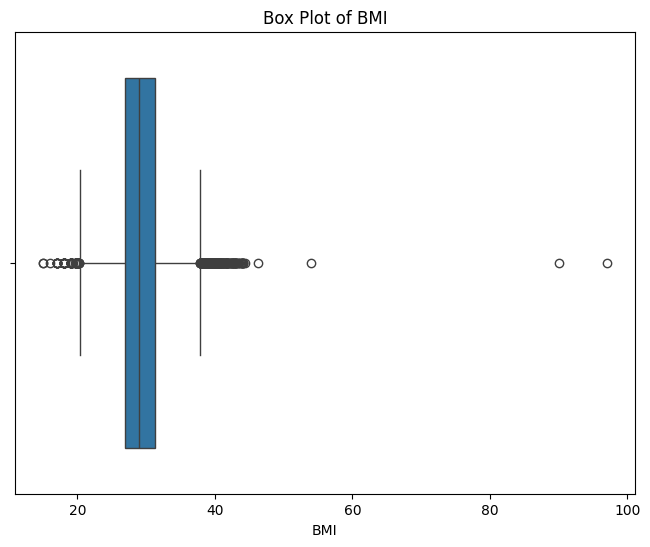

In [131]:

# Plotting box plot to visualize outliers in 'bmi' column
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_df['bmi'])
plt.title('Box Plot of BMI')
plt.xlabel('BMI')
plt.show()


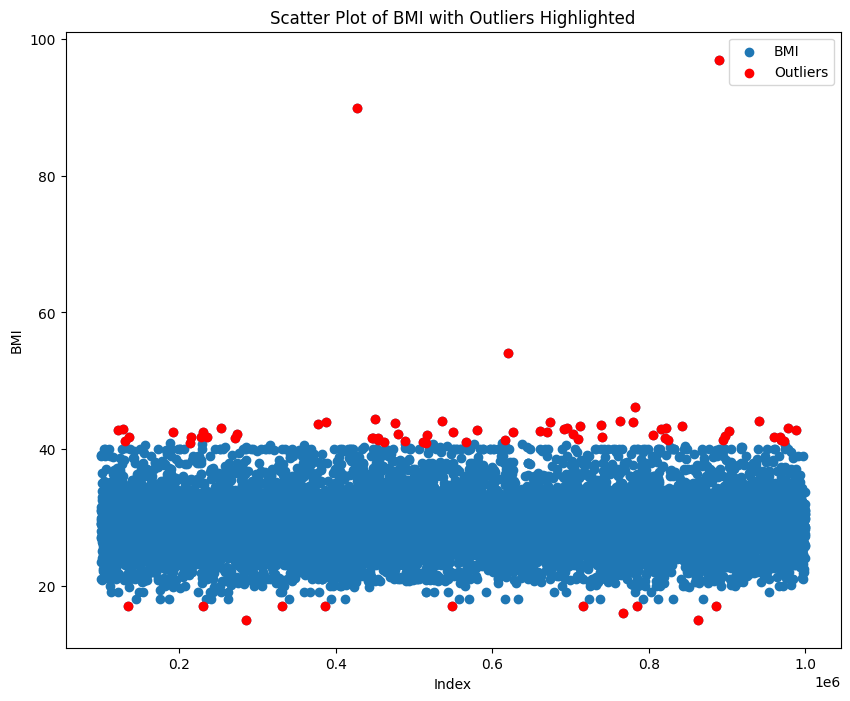

In [135]:
# Define a threshold for outliers (e.g., based on Z-score)
threshold = 3  # Adjust this threshold as needed

# Identify outliers based on threshold (e.g., using Z-score)
bmi_mean = train_df['bmi'].mean()
bmi_std = train_df['bmi'].std()
outliers = train_df[(train_df['bmi'] - bmi_mean).abs() > threshold * bmi_std]

# Plotting scatter plot with outliers highlighted
plt.figure(figsize=(10, 8))
plt.scatter(train_df.index, train_df['bmi'], label='BMI')
plt.scatter(outliers.index, outliers['bmi'], color='red', label='Outliers')
plt.title('Scatter Plot of BMI with Outliers Highlighted')
plt.xlabel('Index')
plt.ylabel('BMI')
plt.legend()
plt.show()
